<a href="https://colab.research.google.com/github/vivek16pawar/Customer-Segmentation/blob/main/Online_Retail_Customer_Segmentation_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Extraction/identification of major topics & themes discussed in news articles. </u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
import plotly.express as px
from datetime import datetime

import warnings
from pylab import rcParams
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import plotly.figure_factory as ff
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_excel('/content/drive/MyDrive/Module 4/Customers Segmentation/Online Retail.xlsx')

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [6]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


## Data Cleaning

In [7]:
df.shape

(541909, 8)

In [8]:
df.drop_duplicates(inplace = True)

In [9]:
df.shape

(536641, 8)

In [10]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

In [11]:
df.dropna(inplace = True)

In [12]:
df.shape

(401604, 8)

In [13]:
df['InvoiceNo'] = df['InvoiceNo'].astype('str')

In [14]:
df["Cancelled_trans"]=np.where(df.InvoiceNo.apply(lambda l: l[0]=="C"), True, False)
df.Cancelled_trans.value_counts() / df.shape[0] * 100

False    97.790859
True      2.209141
Name: Cancelled_trans, dtype: float64

In [15]:
df = df.loc[df.Cancelled_trans == False].copy()
df = df.drop('Cancelled_trans',axis = 1)

In [16]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [17]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,392732.000000,392732.000000,392732.000000
mean,13.153718,3.125596,15287.734822
std,181.588420,22.240725,1713.567773
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13955.000000
50%,6.000000,1.950000,15150.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,8142.750000,18287.000000


In [18]:
df['Amount_spent'] = df['Quantity'] * df['UnitPrice']

In [19]:
df.Amount_spent.describe()

count    392732.000000
mean         22.629195
std         311.083465
min           0.000000
25%           4.950000
50%          12.390000
75%          19.800000
max      168469.600000
Name: Amount_spent, dtype: float64

In [20]:
df['Year']=df['InvoiceDate'].dt.year
df['Month']=df['InvoiceDate'].dt.month
df['Day']=df['InvoiceDate'].dt.day
df['Hour']=df['InvoiceDate'].dt.hour
df['Minutes']=df['InvoiceDate'].dt.minute
df['Day_of_week'] = df['InvoiceDate'].dt.dayofweek

In [21]:
days = {0:'Mon',1:'Tues',2:'Weds',3:'Thurs',4:'Fri',5:'Sat',6:'Sun'}

df['Day_of_week'] = df['Day_of_week'].apply(lambda x: days[x])

In [22]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount_spent,Year,Month,Day,Hour,Minutes,Day_of_week
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12,1,8,26,Weds
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,8,26,Weds
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12,1,8,26,Weds
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,8,26,Weds
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,8,26,Weds


## Exploratory Data Analysis

In [23]:
pd.DataFrame([{'products': len(df['StockCode'].value_counts()),    
               'transactions': len(df['InvoiceNo'].value_counts()),
               'customers': len(df['CustomerID'].value_counts()),  
              }], columns = ['products', 'transactions', 'customers'], index = ['quantity'])

,products,transactions,customers
quantity,3665,18536,4339


In [24]:
df.Country.nunique()

37

In [25]:
country_counts = df.Country.value_counts().sort_values(ascending=False).iloc[0:10]
plt.figure(figsize=(20,5))
px.bar(country_counts ,x = country_counts.index, y = country_counts.values,log_y=True,
       labels={
                     "y": "Transactions",
                     "index": "Countries",
                 },
       title="Which countries made the most transactions?")

<Figure size 1440x360 with 0 Axes>

In [26]:
# Create feature which indicates inside or outside UK
df["UK"] = np.where(df.Country == "United Kingdom", 1, 0)

In [27]:
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount_spent,Year,Month,Day,Hour,Minutes,Day_of_week,UK
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12,1,8,26,Weds,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,8,26,Weds,1


Text(0.5, 1.0, 'Yearly Transactions Count')

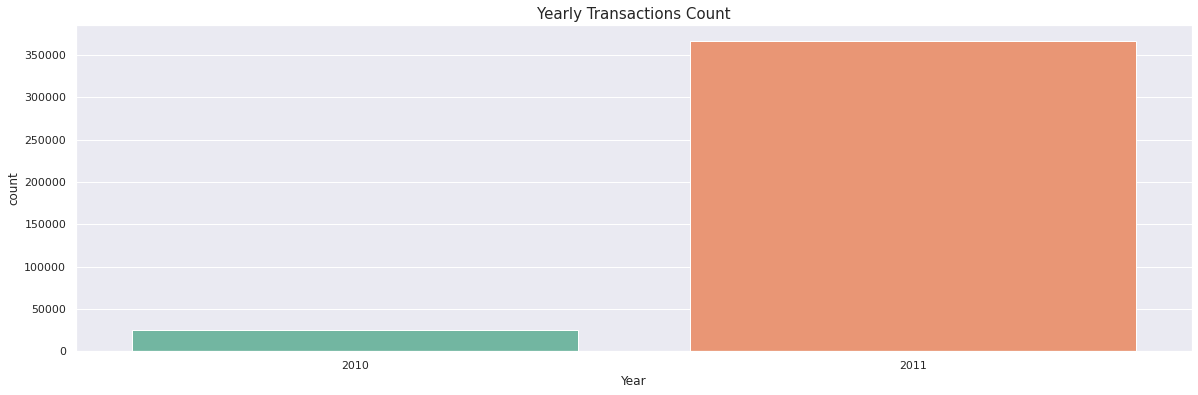

In [28]:
plt.figure(figsize = (20,6))
sns.set_style('darkgrid')
sns.countplot(df.Year,palette='Set2')
plt.title('Yearly Transactions Count',fontsize=15)

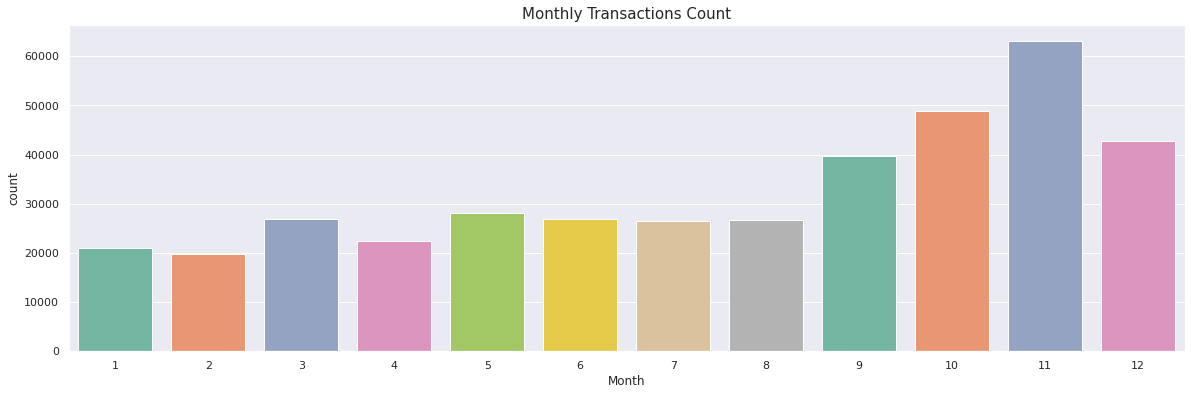

In [29]:
plt.figure(figsize = (20,6))
sns.countplot(df.Month, palette='Set2')
plt.title('Monthly Transactions Count',fontsize=15);

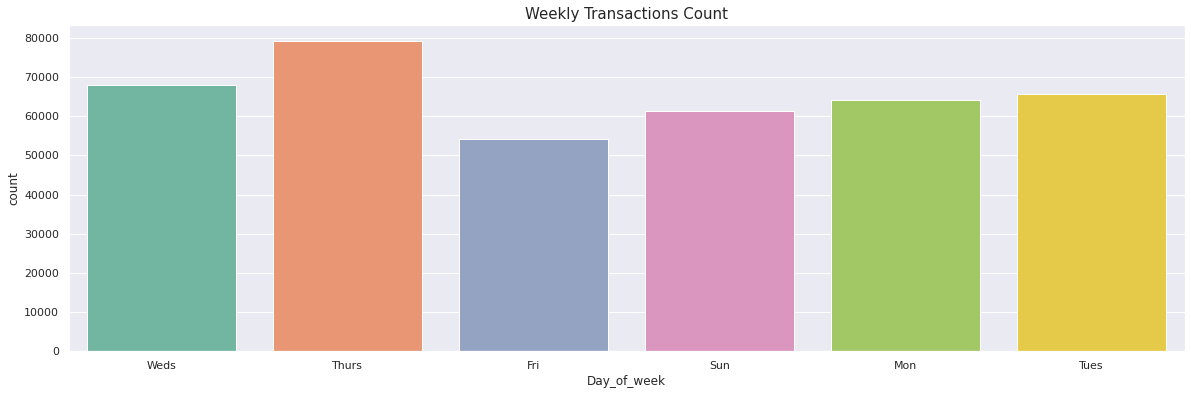

In [30]:
plt.figure(figsize = (20,6))
sns.countplot(df.Day_of_week, palette='Set2')
plt.title('Weekly Transactions Count',fontsize=15);

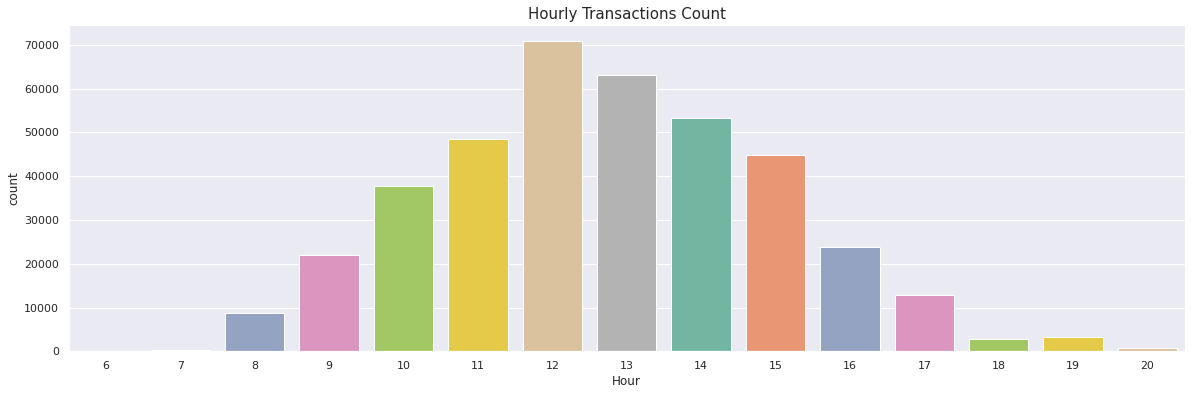

In [31]:
plt.figure(figsize = (20,6))
sns.countplot(df.Hour, palette='Set2')
plt.title('Hourly Transactions Count',fontsize=15);